Author: Dominique Grimes

Title: Image Detection with Sequential Neural Network

In [57]:
# Load libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [73]:
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [31]:
# Assign first 5 data images to variables. Convert BGR to RGB for matplotlib.
image1 = data_train[0]
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = data_train[1]
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image3 = data_train[2]
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

image4 = data_train[3]
image4_rgb = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

image5 = data_train[4]
image5_rgb = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)

AxesImage(size=(28, 28)) (-0.5, 27.5, 27.5, -0.5)


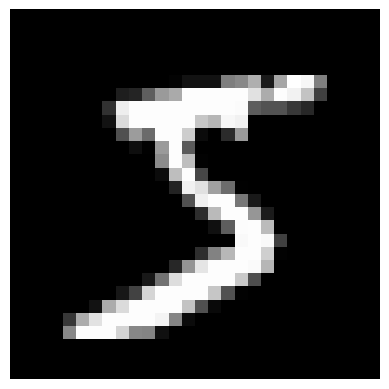

In [32]:
# Show image1
print(plt.imshow(image1_rgb),plt.axis('off'))

In [33]:
# View the target label for the first image. 
target_train[0]

# The image and the label match.

5

AxesImage(size=(28, 28)) (-0.5, 27.5, 27.5, -0.5)


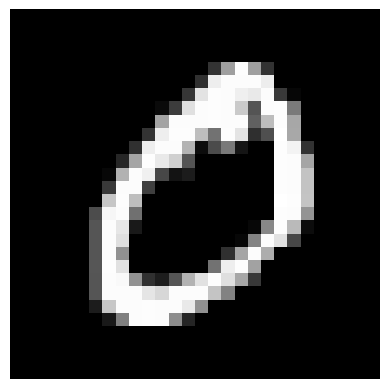

In [34]:
# Show image2
print(plt.imshow(image2_rgb),plt.axis('off'))

In [35]:
# View the target label for the second image. 
target_train[1]

# The image and the label match.

0

AxesImage(size=(28, 28)) (-0.5, 27.5, 27.5, -0.5)


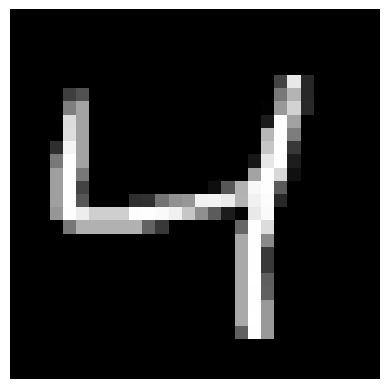

In [36]:
# Show image3
print(plt.imshow(image3_rgb),plt.axis('off'))

In [37]:
# View the target label for the third image. 
target_train[2]

# The image and the label match.

4

AxesImage(size=(28, 28)) (-0.5, 27.5, 27.5, -0.5)


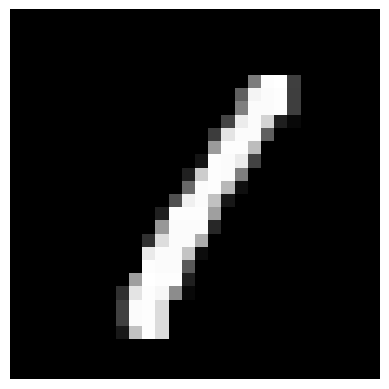

In [38]:
# Show image4
print(plt.imshow(image4_rgb),plt.axis('off'))

In [39]:
# View the target label for the fourth image. 
target_train[3]

# The image and the label match.

1

AxesImage(size=(28, 28)) (-0.5, 27.5, 27.5, -0.5)


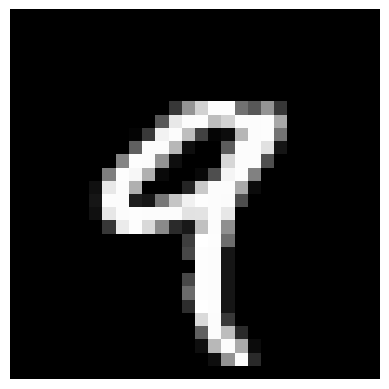

In [40]:
# Show image5
print(plt.imshow(image5_rgb),plt.axis('off'))

In [41]:
# View the target label for the fifth image. 
target_train[4]

# The image and the label match.

9

In [74]:
# Set seed
np.random.seed(0)

In [75]:
# Set image information
channels = 1
height = 28
width = 28

In [76]:
# Reshape data_train into features
data_train = data_train.reshape(data_train.shape[0], height, width, channels)


In [77]:
# Reshape data_test into features
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

In [78]:
# Rescale pixel intensity between 0 & 1
features_train = data_train.astype('float32') / 255
features_test = data_test.astype('float32') / 255

In [79]:
# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [80]:
# Build the model


# Start a neural network by creating a sequential model.
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(64,(5,5),activation='relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(2,2))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# Add fully connected layer of 128 units with a ReLU activatin function
network.add(Dense(128, activation='relu'))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation
network.add(Dense(number_of_classes, activation='softmax'))

In [81]:
# Compile neural network to train the model
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [82]:
# Fit the model to the data
history = network.fit(features_train, target_train, 
            batch_size=1000,
            epochs=10, 
            verbose=0,
            validation_data=(data_test, target_test))

In [83]:
# Evaluate the model on test data
score = network.evaluate(data_test, target_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.168065547943115
Test accuracy: 0.9842000007629395


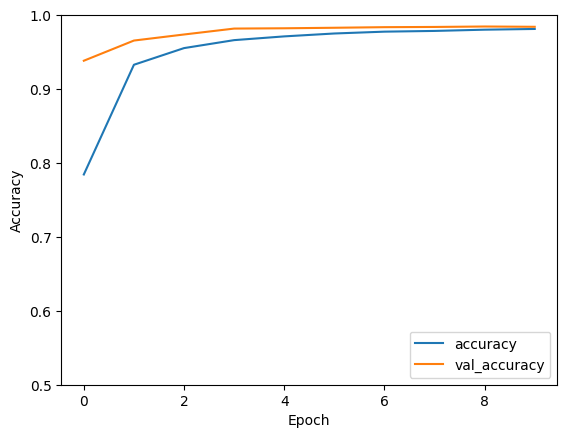

In [88]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [84]:
# Predict values
target_predicted = network.predict(features_test)

313/313 [==============================] - 1s 2ms/step


In [85]:
# Create confusion matrix
target_pred=np.argmax(target_predicted, axis=1)
target_test=np.argmax(target_test, axis=1)
cm = confusion_matrix(target_test, target_pred)
print(cm)

[[ 977    0    0    0    0    1    0    1    1    0]
 [   0 1129    1    1    0    1    1    0    2    0]
 [   2    0 1025    0    1    0    0    4    0    0]
 [   0    0    3  999    0    3    0    3    2    0]
 [   1    0    2    0  971    0    3    0    3    2]
 [   2    0    0    4    0  881    2    0    2    1]
 [   8    2    1    0    1    4  940    0    2    0]
 [   1    0    8    2    0    0    0 1016    1    0]
 [   5    0    2    0    1    0    0    3  962    1]
 [   3    3    0    4    6    2    0    4    4  983]]


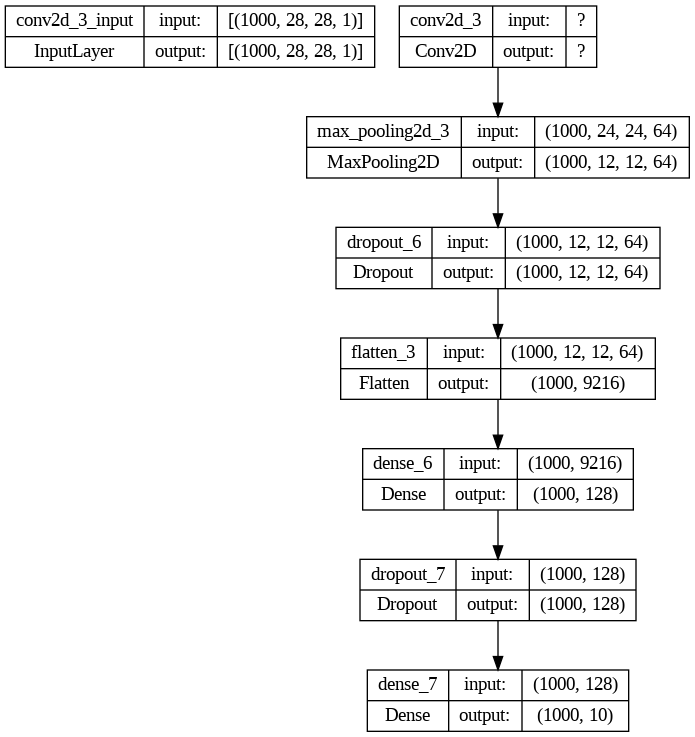

In [89]:
# Summarize the model
from keras.utils.vis_utils import plot_model
plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)